In [1]:
pip install oracledb

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install optbinning

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
from datetime import datetime,date
import oracledb
import datetime
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
from scipy import stats
from optbinning import OptimalBinning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import pickle

(CVXPY) Jul 05 05:13:46 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jul 05 05:13:46 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


# Upload data and cleaning data

In [7]:
#Upload data source
data = pd.read_csv("it_data.csv")

In [8]:
data

,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,CATEGORICAL_2,CATEGORICAL_3,CATEGORICAL_4,CATEGORICAL_5,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10,TARGET
0,0,2014-06-20 11:03:04,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,...,AB,DF,JK,TR,C,A,BB,AA,NFAYV,1
1,1,2014-06-20 11:05:39,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,...,AA,DF,JK,WE,A,A,AA,BB,NFAYV,0
2,2,2014-06-20 11:07:00,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,...,AB,AS,GH,TR,C,C,BB,BB,NFAYV,0
3,3,2014-06-20 11:09:38,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,...,AB,AS,GH,TR,A,A,AA,BB,HNPAK,0
4,4,2014-06-20 11:11:10,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,...,NaN,NaN,NaN,NaN,B,B,BB,BB,NFAYV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2015-05-31 23:08:41,-0.854343,6.521838,-1.265923,-1.084646,-1.187650,0.794497,-0.973259,0.610075,...,NaN,NaN,NaN,NaN,A,B,AA,BB,HNPAK,1
199996,199996,2015-05-31 23:11:20,0.777682,6.781602,-0.075864,-2.030206,-0.730432,0.062135,0.952922,-0.687367,...,AB,DF,GH,TR,C,C,BB,AA,HNPAK,0
199997,199997,2015-05-31 23:15:45,-0.661226,3.670153,-0.526770,1.777090,1.075971,1.998660,-0.748957,0.113520,...,AB,AS,GH,TR,A,C,BB,BB,HNPAK,0
199998,199998,2015-05-31 23:20:13,0.901753,3.913617,2.170829,0.041884,-0.915490,0.986620,0.335343,0.795207,...,AB,DF,JK,WE,B,B,BB,AA,HNPAK,1


In [9]:
# Describe some basic statistical metrics for data source
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID_APPLICATION,200000.0,NaN,NaN,NaN,99999.5,57735.171256,0.0,49999.75,99999.5,149999.25,199999.0
TIME,200000,199308,2014-09-03 15:01:23,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUMERICAL_0,200000.0,NaN,NaN,NaN,-0.00183,0.999961,-5.041812,-0.677794,-0.000979,0.671276,4.211532
NUMERICAL_1,200000.0,NaN,NaN,NaN,5.000895,1.002078,0.198751,4.324913,4.999899,5.678456,9.414779
NUMERICAL_2,200000.0,NaN,NaN,NaN,-0.000573,0.99775,-4.599858,-0.676721,-0.001158,0.676163,4.507487
NUMERICAL_3,200000.0,NaN,NaN,NaN,0.000627,0.9998,-4.367761,-0.674053,0.001651,0.675751,4.562012
NUMERICAL_4,200000.0,NaN,NaN,NaN,-0.000486,0.997575,-4.201645,-0.676196,-0.001613,0.676295,4.512545
NUMERICAL_5,200000.0,NaN,NaN,NaN,-0.000034,0.999116,-4.260481,-0.676146,0.000146,0.671686,4.594435
NUMERICAL_6,200000.0,NaN,NaN,NaN,-0.001882,0.999032,-4.427793,-0.675279,-0.002473,0.675173,4.33445
NUMERICAL_7,200000.0,NaN,NaN,NaN,-0.001406,0.997471,-4.339782,-0.67364,-0.0013,0.670938,4.702401


In [10]:
# Check null data 
data[data.columns[data.isna().any()]].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NUMERICAL_10,143749.0,NaN,NaN,NaN,0.001999,1.001043,-4.350179,-0.670381,0.002565,0.677475,4.562245
NUMERICAL_40,140048.0,NaN,NaN,NaN,-0.009925,1.999029,-8.984837,-1.358991,-0.018323,1.336404,9.598511
CATEGORICAL_2,120166,2,AB,60247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CATEGORICAL_3,120166,2,DF,60229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CATEGORICAL_4,120166,2,GH,60308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CATEGORICAL_5,120166,2,WE,60123,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'NUMERICAL_10'}>,
        <Axes: title={'center': 'NUMERICAL_40'}>]], dtype=object)

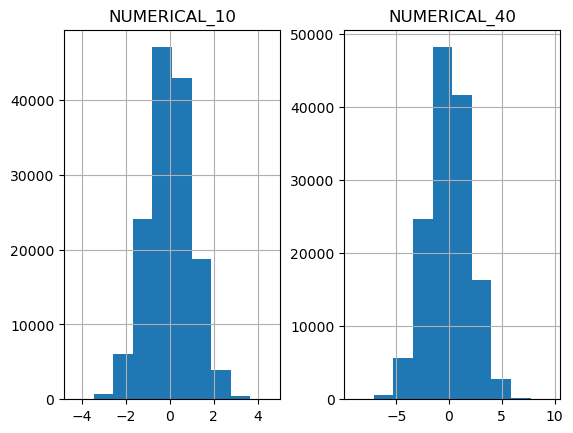

In [12]:
# Check distribution of numerical variables and replace null values by median value

data[['NUMERICAL_10','NUMERICAL_40']].hist()

In [13]:
data[['NUMERICAL_10','NUMERICAL_40']] = data[['NUMERICAL_10','NUMERICAL_40']].fillna(data[['NUMERICAL_10','NUMERICAL_40']].median())

In [14]:
#Replace null values in categorical columns by 'NAN' string.

data[['CATEGORICAL_2','CATEGORICAL_3','CATEGORICAL_4','CATEGORICAL_5']] = data[['CATEGORICAL_2','CATEGORICAL_3','CATEGORICAL_4','CATEGORICAL_5']].fillna('NAN')

In [15]:
# Double check null data again

data.isna().sum()

ID_APPLICATION    0
TIME              0
NUMERICAL_0       0
NUMERICAL_1       0
NUMERICAL_2       0
NUMERICAL_3       0
NUMERICAL_4       0
NUMERICAL_5       0
NUMERICAL_6       0
NUMERICAL_7       0
NUMERICAL_8       0
NUMERICAL_9       0
NUMERICAL_10      0
NUMERICAL_11      0
NUMERICAL_12      0
NUMERICAL_13      0
NUMERICAL_14      0
NUMERICAL_15      0
NUMERICAL_16      0
NUMERICAL_17      0
NUMERICAL_18      0
NUMERICAL_19      0
NUMERICAL_20      0
NUMERICAL_21      0
NUMERICAL_22      0
NUMERICAL_23      0
NUMERICAL_24      0
NUMERICAL_25      0
NUMERICAL_26      0
NUMERICAL_27      0
NUMERICAL_28      0
NUMERICAL_29      0
NUMERICAL_30      0
NUMERICAL_31      0
NUMERICAL_32      0
NUMERICAL_33      0
NUMERICAL_34      0
NUMERICAL_35      0
NUMERICAL_36      0
NUMERICAL_37      0
NUMERICAL_38      0
NUMERICAL_39      0
NUMERICAL_40      0
NUMERICAL_41      0
CATEGORICAL_0     0
CATEGORICAL_1     0
CATEGORICAL_2     0
CATEGORICAL_3     0
CATEGORICAL_4     0
CATEGORICAL_5     0


In [16]:
# Convert categorical data to numerical data 

for col in data.select_dtypes(include = ['object']): 
    if col != 'TIME':
        data[col] = data[col].astype('category').cat.codes
        
    

In [17]:
data

,ID_APPLICATION,TIME,NUMERICAL_0,NUMERICAL_1,NUMERICAL_2,NUMERICAL_3,NUMERICAL_4,NUMERICAL_5,NUMERICAL_6,NUMERICAL_7,...,CATEGORICAL_2,CATEGORICAL_3,CATEGORICAL_4,CATEGORICAL_5,CATEGORICAL_6,CATEGORICAL_7,CATEGORICAL_8,CATEGORICAL_9,CATEGORICAL_10,TARGET
0,0,2014-06-20 11:03:04,0.548205,6.273278,-0.557716,-0.086105,-0.726799,-0.523021,0.571528,0.176804,...,1,1,1,1,2,0,1,0,1,1
1,1,2014-06-20 11:05:39,-0.640991,5.662506,0.050086,0.233125,0.482266,0.085460,-0.552130,-0.017248,...,0,1,1,2,0,0,0,1,1,0
2,2,2014-06-20 11:07:00,0.394312,5.782492,-0.421450,0.756713,0.408276,0.327221,-0.905630,-0.941560,...,1,0,0,1,2,2,1,1,1,0
3,3,2014-06-20 11:09:38,-0.320658,4.736009,0.334894,1.092682,0.646294,1.541267,0.966884,-0.790725,...,1,0,0,1,0,0,0,1,0,0
4,4,2014-06-20 11:11:10,0.433235,5.323432,0.826207,0.718267,-1.627944,2.203108,0.420342,-0.223997,...,2,2,2,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,2015-05-31 23:08:41,-0.854343,6.521838,-1.265923,-1.084646,-1.187650,0.794497,-0.973259,0.610075,...,2,2,2,0,0,1,0,1,0,1
199996,199996,2015-05-31 23:11:20,0.777682,6.781602,-0.075864,-2.030206,-0.730432,0.062135,0.952922,-0.687367,...,1,1,0,1,2,2,1,0,0,0
199997,199997,2015-05-31 23:15:45,-0.661226,3.670153,-0.526770,1.777090,1.075971,1.998660,-0.748957,0.113520,...,1,0,0,1,0,2,1,1,0,0
199998,199998,2015-05-31 23:20:13,0.901753,3.913617,2.170829,0.041884,-0.915490,0.986620,0.335343,0.795207,...,1,1,1,2,1,1,1,0,0,1


# Analysis and choose variable for training modelling

In [18]:
# Check correlation coefficient to choose strong variables
# Correlation coefficient should be equal to or more than 0.1

data.filter(regex = 'NUMERICAL|CATEGORICAL', axis = 1).corrwith(data['TARGET']).sort_values(ascending = False)

NUMERICAL_10      0.244400
NUMERICAL_41      0.186726
CATEGORICAL_1     0.178767
CATEGORICAL_4     0.135013
CATEGORICAL_2     0.134103
NUMERICAL_30      0.133158
CATEGORICAL_3     0.132868
NUMERICAL_40      0.111062
NUMERICAL_16      0.004965
NUMERICAL_34      0.004397
NUMERICAL_39      0.002608
NUMERICAL_23      0.002535
NUMERICAL_12      0.001804
NUMERICAL_8       0.001743
CATEGORICAL_10    0.001305
NUMERICAL_33      0.001184
NUMERICAL_24      0.001057
NUMERICAL_19      0.001056
NUMERICAL_22      0.000885
NUMERICAL_0       0.000884
NUMERICAL_2       0.000751
NUMERICAL_27      0.000714
NUMERICAL_36      0.000488
NUMERICAL_11      0.000435
NUMERICAL_3       0.000209
NUMERICAL_20      0.000024
NUMERICAL_31     -0.000166
NUMERICAL_18     -0.000251
CATEGORICAL_0    -0.000386
NUMERICAL_35     -0.000778
NUMERICAL_32     -0.000994
NUMERICAL_5      -0.001001
NUMERICAL_4      -0.001070
NUMERICAL_6      -0.001167
NUMERICAL_38     -0.001252
NUMERICAL_1      -0.001279
NUMERICAL_7      -0.002138
N

Potential variables: NUMERICAL_10, NUMERICAL_41, CATEGORICAL_1, CATEGORICAL_4, CATEGORICAL_2, NUMERICAL_30, CATEGORICAL_3, NUMERICAL_40, CATEGORICAL_8, CATEGORICAL_6, CATEGORICAL_9, CATEGORICAL_7                 

In [20]:
# Check data types of columns 

data.dtypes

ID_APPLICATION      int64
TIME               object
NUMERICAL_0       float64
NUMERICAL_1       float64
NUMERICAL_2       float64
NUMERICAL_3       float64
NUMERICAL_4       float64
NUMERICAL_5       float64
NUMERICAL_6       float64
NUMERICAL_7       float64
NUMERICAL_8       float64
NUMERICAL_9       float64
NUMERICAL_10      float64
NUMERICAL_11      float64
NUMERICAL_12      float64
NUMERICAL_13      float64
NUMERICAL_14      float64
NUMERICAL_15      float64
NUMERICAL_16      float64
NUMERICAL_17      float64
NUMERICAL_18      float64
NUMERICAL_19      float64
NUMERICAL_20      float64
NUMERICAL_21      float64
NUMERICAL_22      float64
NUMERICAL_23      float64
NUMERICAL_24      float64
NUMERICAL_25      float64
NUMERICAL_26      float64
NUMERICAL_27      float64
NUMERICAL_28      float64
NUMERICAL_29      float64
NUMERICAL_30      float64
NUMERICAL_31      float64
NUMERICAL_32      float64
NUMERICAL_33      float64
NUMERICAL_34      float64
NUMERICAL_35      float64
NUMERICAL_36

In [21]:
col = list(set(data.columns) - set(('ID_APPLICATION','TIME','TARGET')))

In [22]:
# Calculate IV coefficient

# IV:
# <= 0.02: So weak
# 0.02 - 0.1: Week
# 0.1 - 0.3: Normal
# 0.3 - 0.5: Strong
# => 0.5: Really strong, but need to check the correlation between variable and target
# Choose the variable with IV >= 0.1

iv_table = {}
bin_transform = {}
woe_transform = {}
series = {'Index':[1,2,3,4,5,6,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}
mapping  = pd.DataFrame(series)
for i, (fieldname, dtype) in enumerate(zip(data[col].columns, data[col].dtypes.values)):
    if dtype in ['float64']:
        x = data[fieldname].values
        y = data['TARGET']
        optb = OptimalBinning(name=fieldname, dtype="numerical", solver="cp")
        optb.fit(x, y)
        binning_table = optb.binning_table
        iv = binning_table.build()
        
        iv_table[fieldname] = iv.loc['Totals',['Count','Event rate','IV']]
        bin_transform[fieldname] = optb.transform(x, metric="bins")
        woe_transform[fieldname] = optb.transform(x, metric="woe")
        binn = list(optb.splits)
        binn.insert(0,-999999999)
        binn.insert(len(binn),999999999)
        tab = iv[['WoE']]
        tab.columns = ['WoE'+'_'+fieldname]
        mapping = mapping.join(tab).join(pd.DataFrame(binn[0:len(binn)-1],columns = ['Range1_'+fieldname])).join(pd.DataFrame(binn[1:],columns = ['Range2_'+fieldname]))
    if dtype in ['int8']:
        x = data[fieldname].values
        y = data['TARGET'].values
        optb = OptimalBinning(name=fieldname, dtype="categorical", solver="mip",
                      cat_cutoff=0.1)
        optb.fit(x,y)
        iv = optb.binning_table.build()
        iv_table[fieldname] = iv.loc['Totals',['Count','Event rate','IV']]
        bin_transform[fieldname] = optb.transform(x, metric="bins")
        woe_transform[fieldname] = optb.transform(x, metric="woe")
        tab = iv[['WoE','Bin']]
        tab.columns = ['WoE'+'_'+fieldname,'Bin'+'_'+fieldname]
        tab['Bin'+'_'+fieldname] = tab['Bin'+'_'+fieldname].astype(str)
        mapping = mapping.join(tab) 

In [23]:
# IV result for all variables

iv_result = pd.DataFrame(iv_table).transpose().sort_values('IV',ascending=False)
iv_result

,Count,Event rate,IV
CATEGORICAL_7,200000,0.35889,0.395116
CATEGORICAL_9,200000,0.35889,0.366944
NUMERICAL_10,200000,0.35889,0.273113
CATEGORICAL_1,200000,0.35889,0.173157
NUMERICAL_41,200000,0.35889,0.156465
NUMERICAL_1,200000,0.35889,0.1452
CATEGORICAL_6,200000,0.35889,0.139557
NUMERICAL_40,200000,0.35889,0.118517
CATEGORICAL_4,200000,0.35889,0.085147
CATEGORICAL_5,200000,0.35889,0.083967


In [24]:
# Finalize variables to choose to build up model

# CATEGORICAL_7, CATEGORICAL_9, NUMERICAL_10, CATEGORICAL_1, NUMERICAL_41, CATEGORICAL_6, NUMERICAL_40

In [25]:
# Check correlation between chosen variables, if correlation coefficient between them more than 0.7, we should remove one of them.

data[['CATEGORICAL_7', 'CATEGORICAL_9', 'NUMERICAL_10', 'CATEGORICAL_1', 'NUMERICAL_41', 'CATEGORICAL_6', 'NUMERICAL_40']].corr().style.format(precision=3).background_gradient(cmap = 'BuGn')

,CATEGORICAL_7,CATEGORICAL_9,NUMERICAL_10,CATEGORICAL_1,NUMERICAL_41,CATEGORICAL_6,NUMERICAL_40
CATEGORICAL_7,1.000,0.001,0.001,-0.001,0.000,0.488,-0.004
CATEGORICAL_9,0.001,1.000,0.002,-0.001,0.002,-0.002,0.003
NUMERICAL_10,0.001,0.002,1.000,0.002,0.550,-0.001,0.004
CATEGORICAL_1,-0.001,-0.001,0.002,1.000,0.001,-0.000,0.001
NUMERICAL_41,0.000,0.002,0.550,0.001,1.000,-0.002,0.000
CATEGORICAL_6,0.488,-0.002,-0.001,-0.000,-0.002,1.000,-0.000
NUMERICAL_40,-0.004,0.003,0.004,0.001,0.000,-0.000,1.000


# Prepare data for training model

In [26]:
# Create data validation 

X_valid = data[['CATEGORICAL_7', 'CATEGORICAL_9', 'NUMERICAL_10', 'CATEGORICAL_1', 'NUMERICAL_41', 'CATEGORICAL_6', 'NUMERICAL_40']][data['TIME'] >= '2015-05-01 00:00:00']
y_valid = data[['TARGET']][data['TIME'] >= '2015-05-01 00:00:00']

In [27]:
# Create sample for train and test sample

X_resample = data[['CATEGORICAL_7', 'CATEGORICAL_9', 'NUMERICAL_10', 'CATEGORICAL_1', 'NUMERICAL_41', 'CATEGORICAL_6', 'NUMERICAL_40']][data['TIME'] < '2015-05-01 00:00:00']
y_resample = data[['TARGET']][data['TIME'] < '2015-05-01 00:00:00']


In [28]:
# Check the inbalanced dataset
y_resample.value_counts()

TARGET
0         116769
1          65255
Name: count, dtype: int64

In [29]:
# Re-balance dataset

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resample, y_resample)

In [30]:
y_resampled.value_counts()

TARGET
0         116769
1         116769
Name: count, dtype: int64

In [31]:
# Create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

# Training model

# Logistic Regression

Logistic regression:

Algorithm:
Logistic Regression is a widely used algorithm for binary classification tasks, where the goal is to predict a binary outcome (e.g., yes/no, true/false, 0/1) based on one or more predictor variables.
f(x) = 1/(1 + exp(-x))

Pros:
Logistic Regression is one of the simplest machine learning algorithms and is easy to implement yet provides great training efficiency in some cases
Logistic Regression outputs well-calibrated probabilities along with classification results. This is an advantage over models that only give the final classification as results. 
If a training example has a 95% probability for a class, and another has a 55% probability for the same class, we get an inference about which training examples are more accurate for the formulated problem.
In a low dimensional dataset having a sufficient number of training examples, logistic regression is less prone to overfitting.
Useful for binary classification problems where you want to predict the probability of a particular risk occurring based on input features. It's simple, interpretable, and works well when the relationship between features and risk is linear.

Cons:
Logistic Regression assumes a linear relationship between the predictors and the log-odds of the response variable. If the true relationship is highly non-linear, performance may suffer.
Outliers can disproportionately influence the coefficient estimates and hence the predictions.
Performance can depend heavily on the quality of the input features and may require scaling or transformation of features for optimal performance.
If the number of features is very large compared to the number of observations, Logistic Regression may not perform well without regularization.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model1 = LogisticRegression(random_state=42, class_weight=None)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
#Performance
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print(f'Confusion metric: \n {confusion_matrix(y_test,y_pred)}')
print(f'Area under curve: {roc_auc_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy score: 0.771216922154663
Confusion metric: 
 [[17723  5469]
 [ 5217 18299]]
Area under curve: 0.7711684861388584
Recall score: 0.7781510460962748


<Axes: ylabel='Feature'>

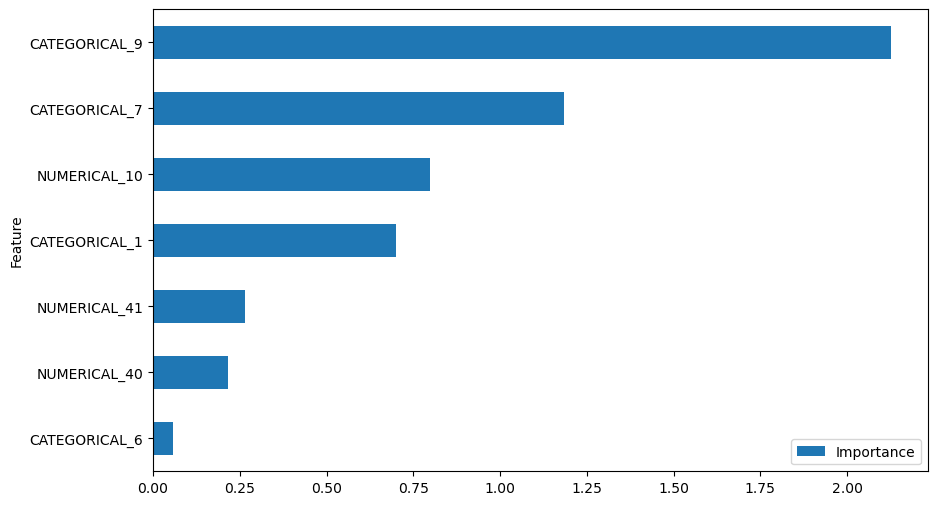

In [33]:
coefficients1 = model1.coef_[0]
feature_importance1 = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients1)})
feature_importance1 = feature_importance1.sort_values('Importance', ascending=True)
feature_importance1.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [34]:
feature_importance1

,Feature,Importance
5,CATEGORICAL_6,0.058400
6,NUMERICAL_40,0.216203
4,NUMERICAL_41,0.264118
3,CATEGORICAL_1,0.700235
2,NUMERICAL_10,0.798085
0,CATEGORICAL_7,1.184668
1,CATEGORICAL_9,2.126772


In [35]:
# save the iris classification model as a pickle file
model_pkl_file_1 = "Model_logistic.pkl"  

with open(model_pkl_file_1, 'wb') as file:  
    pickle.dump(model1, file)
    
with open(model_pkl_file_1, 'rb') as file:  
    model1 = pickle.load(file)

# evaluate model 
y_valid_predict = model1.predict(X_valid)

print(f'Accuracy Score: {accuracy_score(y_valid,y_valid_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_valid, y_valid_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_valid, y_valid_predict)}')
print(f'Recall score: {recall_score(y_valid,y_valid_predict)}')

Accuracy Score: 0.5620271473075211
Confusion Matrix: 
[[8513 2940]
 [4933 1590]]
Area Under Curve: 0.4935257867375479
Recall score: 0.2437528744442741


# Decision tree

Decision tree

Algorithm:
A decision tree is a flowchart-like structure used to make decisions or predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. 
Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value.

The process of creating a decision tree involves:

Selecting the Best Attribute: Using a metric like Gini impurity, entropy, or information gain, the best attribute to split the data is selected.
Splitting the Dataset: The dataset is split into subsets based on the selected attribute.
Repeating the Process: The process is repeated recursively for each subset, creating a new internal node or leaf node until a stopping criterion is met (e.g., all instances in a node belong to the same class or a predefined depth is reached).
    
Pros:
Decision trees are easy to understand and interpret. The visual representation closely mirrors human decision-making processes.
Can be used for both classification and regression tasks.
Decision trees do not require normalization or scaling of the data.
Capable of capturing non-linear relationships between features and target variables.

Cons:
Decision trees can easily overfit the training data, especially if they are deep with many nodes.
Small variations in the data can result in a completely different tree being generated.
Features with more levels can dominate the tree structure.

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

In [37]:
model2 = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# evaluate model
scores = cross_val_score(model2, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7461248608375439
Confusion Matrix: 
[[17086  6106]
 [ 5752 17764]]
Area Under Curve: 0.7460600683990427
Recall score: 0.7554005783296479


<Axes: ylabel='Feature'>

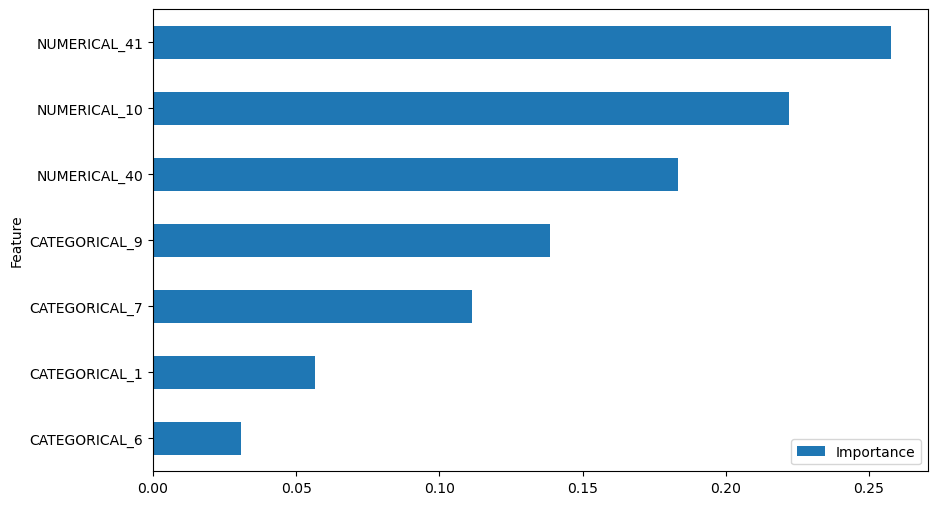

In [38]:
coefficients2 = model2.feature_importances_
feature_importance2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients2)})
feature_importance2 = feature_importance2.sort_values('Importance', ascending=True)
feature_importance2.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [39]:
feature_importance2

,Feature,Importance
5,CATEGORICAL_6,0.030561
3,CATEGORICAL_1,0.056675
0,CATEGORICAL_7,0.111464
1,CATEGORICAL_9,0.138488
6,NUMERICAL_40,0.183148
2,NUMERICAL_10,0.221924
4,NUMERICAL_41,0.257740


In [40]:
# Save the iris classification model as a pickle file
model_pkl_file_2 = "Model_decision_tree.pkl"  

with open(model_pkl_file_2, 'wb') as file:  
    pickle.dump(model2, file)
    
with open(model_pkl_file_2, 'rb') as file:  
    model2 = pickle.load(file)

# evaluate model 
y_valid_predict = model2.predict(X_valid)

print(f'Accuracy Score: {accuracy_score(y_valid,y_valid_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_valid, y_valid_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_valid, y_valid_predict)}')
print(f'Recall score: {recall_score(y_valid,y_valid_predict)}')

Accuracy Score: 0.5906208277703605
Confusion Matrix: 
[[8320 3133]
 [4226 2297]]
Area Under Curve: 0.5392929028045875
Recall score: 0.3521385865399356


# XGBoosting

XGboosting:

Algorithm:
XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. 
It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction. 
XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

Pros:
XGBoost has a strong track record of producing high-quality results in various machine learning tasks, especially in Kaggle competitions, where it has been a popular choice for winning solutions.
XGBoost is designed for efficient and scalable training of machine learning models, making it suitable for large datasets.
XGBoost has a wide range of hyperparameters that can be adjusted to optimize performance, making it highly customizable.
XGBoost has built-in support for handling missing values, making it easy to work with real-world data that often has missing values.

Cons:
XGBoost can be computationally intensive, especially when training large models, making it less suitable for resource-constrained systems.
XGBoost can be prone to overfitting, especially when trained on small datasets or when too many trees are used in the model.
XGBoost has many hyperparameters that can be adjusted, making it important to properly tune the parameters to optimize performance. However, finding the optimal set of parameters can be time-consuming and requires expertise.

In [41]:
from xgboost import XGBClassifier
model3 = XGBClassifier(n_estimators = 1000)
model3.fit(X_train, y_train.values.ravel(), early_stopping_rounds = 5, eval_set=[(X_test, y_test)], verbose = False)
y_pred = model3.predict(X_test)
print('Accuracy of xgboost classifier on test set: {:.2f}'.format(model3.score(X_test, y_test)))

Accuracy of xgboost classifier on test set: 0.79


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     23192
           1       0.79      0.79      0.79     23516

    accuracy                           0.79     46708
   macro avg       0.79      0.79      0.79     46708
weighted avg       0.79      0.79      0.79     46708



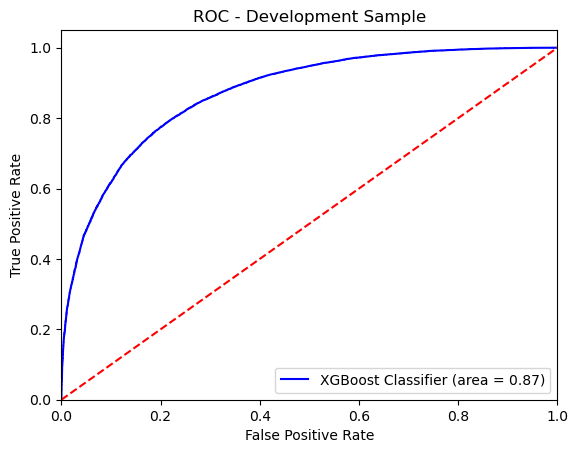

Accuracy: 78.74%
AUC: 87.20%
Gini: 74.40%
              precision    recall  f1-score   support

           0       0.79      0.78      0.79     23192
           1       0.79      0.79      0.79     23516

    accuracy                           0.79     46708
   macro avg       0.79      0.79      0.79     46708
weighted avg       0.79      0.79      0.79     46708



In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.title('ROC - Development Sample')
plt.plot(fpr, tpr,'b', label = 'XGBoost Classifier (area = %0.2f)'%roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.savefig('Log_ROC')
plt.show()

print('Accuracy: {:.2%}'.format(model3.score(X_test, y_test)))
print('AUC: {0:.2%}'.format(metrics.auc(fpr, tpr)))
print('Gini: {0:.2%}'.format(roc_auc*2-1))
print(classification_report(y_test, y_pred))

<Axes: ylabel='Feature'>

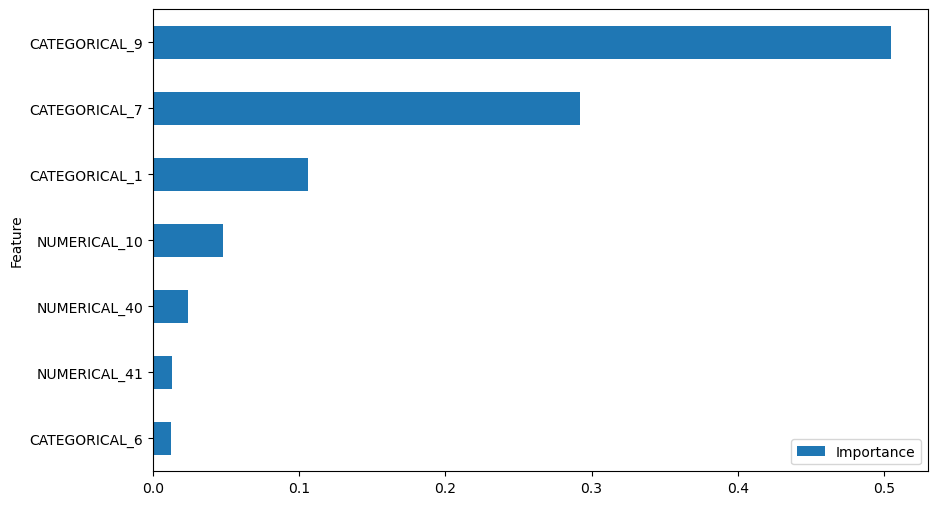

In [44]:
coefficients3 = model3.feature_importances_
feature_importance3 = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients3)})
feature_importance3 = feature_importance3.sort_values('Importance', ascending=True)
feature_importance3.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [45]:
feature_importance3

,Feature,Importance
5,CATEGORICAL_6,0.012389
4,NUMERICAL_41,0.013131
6,NUMERICAL_40,0.024141
2,NUMERICAL_10,0.047655
3,CATEGORICAL_1,0.106021
0,CATEGORICAL_7,0.291813
1,CATEGORICAL_9,0.504851


In [46]:
# Save the iris classification model as a pickle file
model_pkl_file_3 = "Model_XGBoost.pkl"  

with open(model_pkl_file_3, 'wb') as file:  
    pickle.dump(model3, file)
    
with open(model_pkl_file_3, 'rb') as file:  
    model3 = pickle.load(file)

# evaluate model 
y_valid_predict = model3.predict(X_valid)

print(f'Accuracy Score: {accuracy_score(y_valid,y_valid_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_valid, y_valid_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_valid, y_valid_predict)}')
print(f'Recall score: {recall_score(y_valid,y_valid_predict)}')

Accuracy Score: 0.5906764574988874
Confusion Matrix: 
[[8802 2651]
 [4707 1816]]
Area Under Curve: 0.5234658858587669
Recall score: 0.2783995094281772


# Find out the reason to drop performance 

As we see, the performance on validation sample is drammatically drop in the period 5/2015. The hypothesis is something is changed in training variables and some issue 
is happened lead to model performance is drop strongly as the result above

We calculate PSI to double check the stability between training sample and validation sample

PSI (Population Stability Index) is a statistical measure used in the context of model monitoring and validation, particularly in the field of credit scoring 
and risk modeling. 
It helps assess whether the distribution of a predictor variable has shifted between two populations or time periods, which can indicate potential issues with 
model stability


PSI < 0.1: No significant change, model is stable.
0.1 ≤ PSI < 0.25: Moderate change, potential concern.
PSI ≥ 0.25: Significant change, likely requires model re-evaluation or recalibration.
    
As result below, almost of variables are changed alot, including CATEGORICAL_7, NUMERICAL_10, CATEGORICAL_9, CATEGORICAL_1. 
These variables is the most important variables in building up 3 of models above.

So that is the reason why modelling performance is drop as that. We neet to deep-dive and re binning new scale for these variables.



In [51]:
def prepare_data_for_plotting(dev_data, val_data, col_name, num_bins=10):
    if dev_data[col_name].dtypes in ['float64']:
        bins = np.linspace(dev_data[col_name].min(), dev_data[col_name].max(), num_bins + 1)
        dev_data['bin'] = pd.cut(dev_data[col_name], bins=bins, include_lowest=True)
        val_data['bin'] = pd.cut(val_data[col_name], bins=bins, include_lowest=True)
        dev_group = dev_data.groupby('bin')[col_name].count().reset_index(name='dev_count')
        val_group = val_data.groupby('bin')[col_name].count().reset_index(name='val_count')
        # Merge dev and val counts
        merged_counts = dev_group.merge(val_group, on='bin', how='left')
        # Calculate percentages
        merged_counts['dev_pct'] = merged_counts['dev_count'] / len(dev_data) * 100
        merged_counts['val_pct'] = merged_counts['val_count'] / len(val_data) * 100
        merged_counts['psi'] = (merged_counts['val_pct'] - merged_counts['dev_pct']) * np.log(merged_counts['val_pct'] / merged_counts['dev_pct'])
    else:
        dev = dev_data.groupby(col_name)[col_name].count()
        val = val_data.groupby(col_name)[col_name].count()
        dev_group = pd.DataFrame({'bin': dev.index, 'dev_count': dev.values})
        val_group = pd.DataFrame({'bin': val.index, 'val_count': val.values})
        # Merge dev and val counts
        merged_counts = dev_group.merge(val_group, on='bin', how='left')
        # Calculate percentages
        merged_counts['dev_pct'] = merged_counts['dev_count'] / len(dev_data) * 100
        merged_counts['val_pct'] = merged_counts['val_count'] / len(val_data) * 100
        merged_counts['psi'] = (merged_counts['val_pct'] - merged_counts['dev_pct']) * np.log(merged_counts['val_pct'] / merged_counts['dev_pct'])
    return  merged_counts['psi'].sum()

In [52]:
psi = []
for col in X_train.columns:
    psi.append(prepare_data_for_plotting(X_train,X_valid,col))

In [53]:
psi_data = pd.DataFrame({'Variable': X_train.columns[:-1], 'PSI':psi})

In [56]:
psi_data.sort_values(by = 'PSI', ascending = False)

,Variable,PSI
0,CATEGORICAL_7,39.147471
2,NUMERICAL_10,18.651692
1,CATEGORICAL_9,1.232704
3,CATEGORICAL_1,0.418013
4,NUMERICAL_41,0.216068
5,CATEGORICAL_6,0.204057
6,NUMERICAL_40,0.097203
